In [1]:
import pandas as pd 
import numpy as np 
import os
from datetime import datetime

In [2]:
# os.chdir('../')

In [3]:
# os.listdir()

In [4]:
cab_data=pd.read_csv('dataset/cab_rides.csv')
weather_data=pd.read_csv('dataset/weather.csv')


# convert to time_stamp to date time

In [5]:
cab_data['date_time']=pd.to_datetime(cab_data['time_stamp']/1000,unit='s')
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'], unit='s')

# create a new column for merging the dataset

In [6]:
cab_data['merge_date']=cab_data['source'].astype(str)+' - '+cab_data['date_time'].dt.date.astype(str)+' - '+cab_data['date_time'].dt.hour.astype(str)
weather_data['merge_date']=weather_data['location'].astype(str)+' - '+weather_data['date_time'].dt.date.astype(str)+' - '+weather_data['date_time'].dt.hour.astype(str)
weather_data.index=weather_data['merge_date']

In [7]:
merged_df=cab_data.join(weather_data, on=['merge_date'],rsuffix='_w')
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,NaN,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4


# merge data

In [8]:
merged_df.isna().sum()

distance                  0
cab_type                  0
time_stamp                0
destination               0
source                    0
price                100909
surge_multiplier          0
id                        0
product_id                0
name                      0
date_time                 0
merge_date                0
temp                   2964
location               2964
clouds                 2964
pressure               2964
rain                1061692
time_stamp_w           2964
humidity               2964
wind                   2964
date_time_w            2964
merge_date_w           2964
dtype: int64

# check for empty values

In [9]:
merged_df['rain'].fillna(0,inplace=True)

C:\Users\26amr\AppData\Local\Temp\ipykernel_10580\2369464535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['rain'].fillna(0,inplace=True)


In [10]:
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [11]:
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [12]:
merged_df['day'] = merged_df.date_time.dt.dayofweek

In [13]:
merged_df['hour'] = merged_df.date_time.dt.hour

In [14]:
merged_df['month']=merged_df.date_time.dt.month

In [15]:
merged_df['day'].describe()

count    1.164996e+06
mean     2.388427e+00
std      1.743907e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [16]:
merged_df.to_csv('dataset/merged_data.csv')
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
month               1164996
dtype: int64

In [17]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour', 'month'],
      dtype='object')

In [18]:
print(weather_data.columns)
weather_data['location']

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'date_time', 'merge_date'],
      dtype='object')


merge_date
Back Bay - 2018-12-16 - 23                                 Back Bay
Beacon Hill - 2018-12-16 - 23                           Beacon Hill
Boston University - 2018-12-16 - 23               Boston University
Fenway - 2018-12-16 - 23                                     Fenway
Financial District - 2018-12-16 - 23             Financial District
                                                     ...           
North Station - 2018-12-03 - 6                        North Station
Northeastern University - 2018-12-03 - 6    Northeastern University
South Station - 2018-12-03 - 6                        South Station
Theatre District - 2018-12-03 - 6                  Theatre District
West End - 2018-12-03 - 6                                  West End
Name: location, Length: 6276, dtype: object

In [19]:
weather_data[['temp','clouds','pressure','rain','time_stamp','humidity','wind','location']].groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.056012,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.057097,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.054688,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.054863,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.061352,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.059593,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.058712,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.056542,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.054197,1.543857e+09,0.767648,6.749426


In [20]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour', 'month'],
      dtype='object')

In [21]:
merged_df_clean=merged_df.drop(columns=['id','product_id','time_stamp_w'])

In [22]:
merged_df_clean.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date_time,merge_date,...,clouds,pressure,rain,humidity,wind,date_time_w,merge_date_w,day,hour,month
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,Haymarket Square - 2018-12-16 - 9,...,0.29,1022.25,0.0000,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9,6,9,12
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2,...,1.00,1003.17,0.1123,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2,1,2,11
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,Haymarket Square - 2018-11-27 - 2,...,0.99,1002.59,0.0997,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2,1,2,11
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,Haymarket Square - 2018-11-30 - 4,...,0.00,1013.71,0.0000,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4,4,4,11
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,Haymarket Square - 2018-11-29 - 3,...,0.42,998.64,0.0000,0.71,11.30,2018-11-29 03:32:09,Haymarket Square - 2018-11-29 - 3,3,3,11


In [23]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour', 'month'],
      dtype='object')

In [24]:
merged_df['name'].unique()

array(['Shared', 'Lux', 'Lux Black XL', 'Lyft XL', 'Lux Black', 'Lyft',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [25]:
merged_df[['distance','time_stamp','price','surge_multiplier','temp','clouds','pressure','rain','humidity','wind','day','hour','month']].corr()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,day,hour,month
distance,1.000000,0.001844,0.345648,0.025487,-0.002300,-0.000693,0.001457,-0.002469,-0.003333,-0.002056,0.003097,-0.001346,0.000658
time_stamp,0.001844,1.000000,0.000549,0.000582,-0.264111,-0.082449,0.593914,-0.134201,-0.203939,-0.121231,0.306171,0.056391,0.836530
price,0.345648,0.000549,1.000000,0.240652,0.000818,0.001943,0.000295,-0.001108,-0.001899,0.000390,0.001339,-0.000494,0.000282
surge_multiplier,0.025487,0.000582,0.240652,1.000000,-0.001773,-0.000564,-0.002318,-0.005030,-0.003105,-0.000609,-0.000329,0.000676,-0.000330
temp,-0.002300,-0.264111,0.000818,-0.001773,1.000000,0.520569,-0.245069,0.185374,0.356719,0.156654,-0.173013,0.191957,-0.120408
clouds,-0.000693,-0.082449,0.001943,-0.000564,0.520569,1.000000,-0.078491,0.221853,0.441236,0.116650,-0.244061,0.093700,-0.015301
pressure,0.001457,0.593914,0.000295,-0.002318,-0.245069,-0.078491,1.000000,0.000075,-0.041617,-0.557259,0.466310,-0.042227,0.670675
rain,-0.002469,-0.134201,-0.001108,-0.005030,0.185374,0.221853,0.000075,1.000000,0.256481,0.224417,-0.144822,-0.208121,-0.118394
humidity,-0.003333,-0.203939,-0.001899,-0.003105,0.356719,0.441236,-0.041617,0.256481,1.000000,-0.242427,-0.227731,-0.246443,-0.078459
wind,-0.002056,-0.121231,0.000390,-0.000609,0.156654,0.116650,-0.557259,0.224417,-0.242427,1.000000,-0.241942,-0.043662,-0.343197


<Axes: >

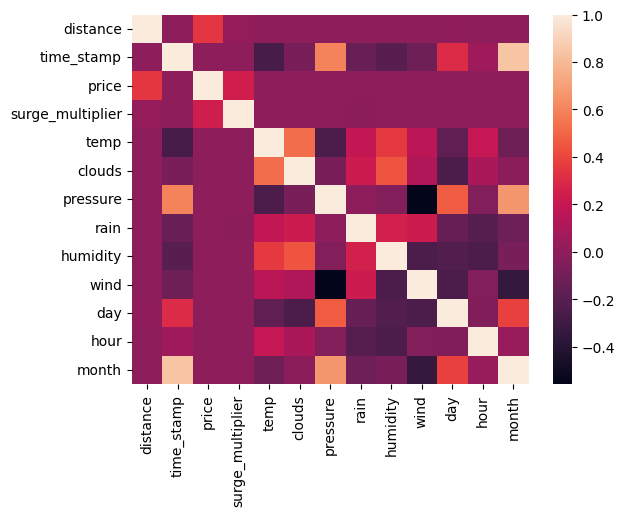

In [26]:
import seaborn as sns

sns.heatmap(merged_df[['distance','time_stamp','price','surge_multiplier','temp','clouds','pressure','rain','humidity','wind','day','hour','month']].corr(),annot=False)


In [27]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour', 'month'],
      dtype='object')

In [28]:
final_dataset=merged_df[['distance','cab_type','destination','source','price','surge_multiplier','name','date_time','temp','location','clouds','pressure','rain','humidity','wind','day','hour','month']]

In [29]:
final_dataset.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,temp,location,clouds,pressure,rain,humidity,wind,day,hour,month
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,38.46,Haymarket Square,0.29,1022.25,0.0000,0.76,7.68,6,9,12
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,44.31,Haymarket Square,1.00,1003.17,0.1123,0.90,13.69,1,2,11
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,43.82,Haymarket Square,0.99,1002.59,0.0997,0.89,11.57,1,2,11
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,35.08,Haymarket Square,0.00,1013.71,0.0000,0.70,5.25,4,4,11
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,37.58,Haymarket Square,0.42,998.64,0.0000,0.71,11.30,3,3,11


In [30]:
final_dataset.to_csv('dataset/cleaned_dataset.csv',index=False)

In [31]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164996 entries, 0 to 693070
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1164996 non-null  float64       
 1   cab_type          1164996 non-null  object        
 2   destination       1164996 non-null  object        
 3   source            1164996 non-null  object        
 4   price             1164996 non-null  float64       
 5   surge_multiplier  1164996 non-null  float64       
 6   name              1164996 non-null  object        
 7   date_time         1164996 non-null  datetime64[ns]
 8   temp              1164996 non-null  float64       
 9   location          1164996 non-null  object        
 10  clouds            1164996 non-null  float64       
 11  pressure          1164996 non-null  float64       
 12  rain              1164996 non-null  float64       
 13  humidity          1164996 non-null  float64     